## Assignment07
## StudentID : 20155212
## Name : Choi Bowon
## GitHub : https://github.com/ChoiBowon/Assignment

### Import packages for project
### - numpy.linalg is needed for inverse matrix

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

### Define num, std, result

In [155]:
num     = 1001
std     = 5 
result  = 0

### Define function for generating coordinates

In [156]:
def fun(x):
    # f = np.sin(x) * (1 / (1 + np.exp(-x))) 
    f = np.abs(x) * np.sin(x)

    return f


### Define function for getting approximation

In [157]:
def approx(x,y,p):
    arr = np.ones((x.shape[0],p))
    for i in range(p):
        arr.T[i] = x**i;
    result = np.dot(np.dot(lin.inv(np.dot(arr.T,arr)),arr.T),y)
    return np.dot(arr,result)

### Define n, nn, x, y1, y2
### - y1 are points with noise

In [158]:
n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)+nn*std
y2      = fun(x)

### Plot Points with noise

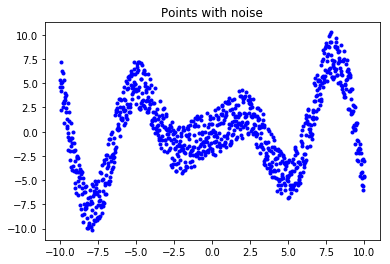

In [159]:
plt.plot(x, y1, 'b.')
plt.title('Points with noise')
plt.show()

### Plot points without noise

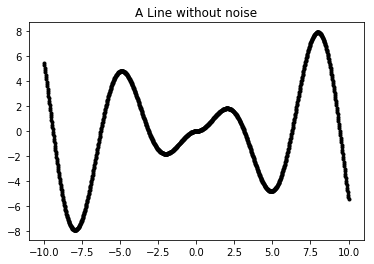

In [160]:
plt.plot(x,y2,'k.')
plt.title('A Line without noise')
plt.show()

### Plot the polynomial curves that fit the noisy data by the least squre error

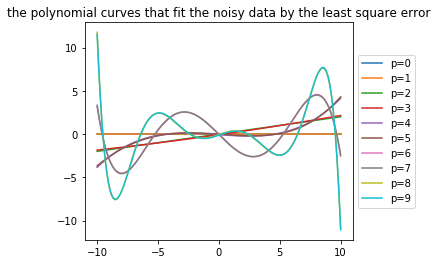

In [161]:
fig = plt.figure()
fig1 = plt.subplot(111)

for i in range(10):
    curves = approx(x, y1, i)
    string = "p="+str(i)
    fig1.plot(x, curves, label=string)

box = fig1.get_position()
fig1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
fig1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig1.set_title('the polynomial curves that fit the noisy data by the least square error')
plt.show()

### Define function for getting errors

In [162]:
def error_fun(y1, y2):
    error = y2-y1
    error = (np.abs(error))**2
    
    return error

### Plot errors between points without noise and optimized data

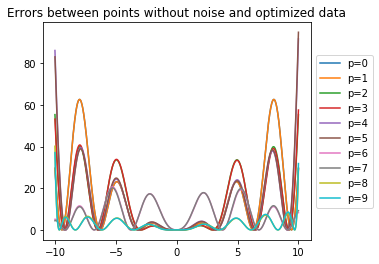

In [163]:
fig = plt.figure()
fig2 = plt.subplot(111)

for i in range(10):
    curves = approx(x, y1, i)
    string = "p="+str(i)
    fig2.plot(x, error_fun(curves,y2), label=string)

box = fig2.get_position()
fig2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig2.set_title('Errors between points without noise and optimized data')
plt.show()

### Plot errors between points with noise and optimized data

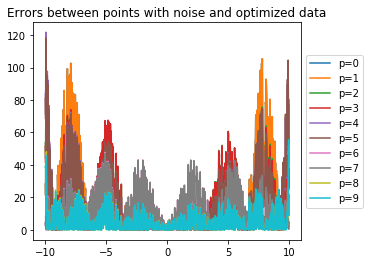

In [164]:
fig = plt.figure()
fig3 = plt.subplot(111)

for i in range(10):
    curves = approx(x, y1, i)
    string = "p="+str(i)
    fig3.plot(x, error_fun(curves,y1), label=string)

box = fig3.get_position()
fig3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
fig3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig3.set_title('Errors between points with noise and optimized data')
plt.show()